In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression 
sns.set()

# Dataset Gathering and Structuring

In [2]:
X, y = make_regression(n_samples=100, 
                       n_features=6,
                       n_informative=6,
                       noise= 20,
                       random_state=0
)
print(X[:10])

[[-0.53945463 -2.28862004 -2.01640663 -0.27567053  0.25148442 -0.70972797]
 [ 0.33996498  0.69845715  0.93184837 -0.01568211  0.00377089  0.16092817]
 [ 0.06326199 -0.46359597 -1.54079701  0.15650654  0.48148147  0.23218104]
 [-2.22340315 -0.35399391 -0.6436184   0.62523145 -1.37495129 -1.60205766]
 [-0.18718385  2.26975462  0.04575852  1.53277921 -1.45436567  1.46935877]
 [-0.96461201  0.87583276  0.45741561 -0.78262916 -0.11510747 -0.1103893 ]
 [-1.47183501  0.03863055 -0.98551074  1.64813493 -1.6567151   0.16422776]
 [-0.29779088 -0.63743703 -0.13288058 -0.30901297 -0.39727181 -1.67600381]
 [-0.43782004  1.12663592 -1.14746865 -0.49803245 -1.07993151  1.92953205]
 [-1.46642433  1.15233156 -0.81336426  0.52106488  1.07961859 -0.57578797]]


# Normalizing the dataset using min max normalization

In [3]:
normalized_X=(X-X.min())/(X.max()-X.min())
print(normalized_X)
normalized_y = (y-y.min())/(y.max()-y.min())
print(normalized_y)

[[0.43652528 0.13191825 0.17932264 0.48246176 0.57426274 0.40687317]
 [0.58967112 0.65210046 0.69274419 0.52773724 0.53112486 0.55849289]
 [0.54148489 0.44973563 0.2621473  0.55772289 0.6143154  0.57090117]
 [0.14327539 0.46882219 0.41838576 0.63934862 0.29102837 0.25147912]
 [0.4978712  0.92573282 0.53843677 0.79739281 0.27719882 0.78634851]
 [0.36248658 0.68298939 0.61012447 0.39417785 0.51042289 0.51124453]
 [0.27415664 0.53719547 0.35884719 0.81748135 0.24196084 0.5590675 ]
 [0.47860963 0.41946222 0.5073278  0.47665536 0.4612856  0.23860182]
 [0.45422436 0.72666531 0.33064316 0.44373872 0.34240436 0.86648503]
 [0.27509887 0.73114006 0.38882551 0.62120862 0.71847751 0.43019804]
 [0.58314192 0.52556041 0.54205177 0.42000466 0.6050597  0.46729891]
 [0.50267939 0.29811479 0.65128476 0.50718483 0.29594512 0.71815103]
 [0.41038708 0.35036078 0.39055904 0.45113984 0.64916393 0.53351208]
 [0.47782391 0.74471619 0.46301746 0.34786875 0.73985568 0.28318028]
 [0.59791084 0.49443711 0.23475288

## Splitting the dataset into 75/ 25 split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size = 0.25, random_state = 50, shuffle = True)

Generating a randomn forest Regressor

In [5]:
rf = RandomForestRegressor(max_depth = 5, random_state = 50, oob_score = True)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, oob_score=True, random_state=50)

Predicting the values for the X testing data

In [6]:
rf.predict(X_test)

array([0.53003922, 0.33147254, 0.45533604, 0.37868506, 0.47354437,
       0.31495098, 0.68639476, 0.43620549, 0.38377481, 0.58676056,
       0.39663033, 0.43997493, 0.30201939, 0.32318153, 0.41953939,
       0.31618888, 0.38803983, 0.32954003, 0.53724545, 0.49201948,
       0.52193004, 0.30429985, 0.30878588, 0.57310627, 0.48383337])

$R^2$ value

In [7]:
r2 = r2_score(y_test, rf.predict(X_test))
mse = mean_squared_error(y_test, rf.predict(X_test))
mae = mean_absolute_error(y_test, rf.predict(X_test))
print(r2, mse, mae)

0.7269980361484302 0.008056871612919009 0.07616489816043366


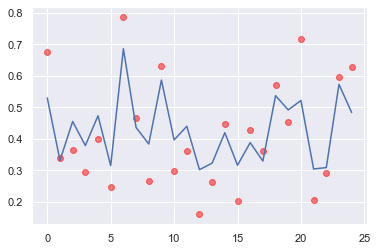

In [8]:
X = list(range(len(X_test)))
plt.scatter(X, y_test, color='red', alpha=0.5)
plt.plot(rf.predict(X_test))
plt.show()